# Simulation

This is the experiment to generate simulation data


In [3]:
%load_ext rpy2.ipython

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


In [4]:
import sys 
import os
import math
import datetime
import os
import json
import re
import pprint
import pandas as pd
from subprocess import *
import subprocess
import numpy as np
from importlib import reload  # Python 3.4+ only.
from IPython.display import Image

cwd = os.getcwd()
print(cwd)
# Adapt this path, it needs to point on the folder containing experiments/exptools.py.
sys.path.insert(1, os.path.abspath("src"))
import analysis
reload(analysis)

/home/adfaure/Projects/ptask-eval/analysis


<module 'analysis' from '/home/adfaure/Projects/ptask-eval/analysis/src/analysis.py'>

In [5]:
master_host="10.158.20.3"
server="10.158.20.2"
client="10.158.24.2"

profile=  "../experiments/simgrid/data/test.json"
hostfile= "../experiments/simgrid/hostfiles/smpi_hostfile"
csv_path = "../experiments/simgrid/data"


In [6]:
import re
string = '[10.158.20.3:simulation:(1) 312.000000] [mwe/INFO] Parallel task finished'
m = re.match(r'\[.* ([0-9\.]+)\] \[mwe/INFO\] Parallel task finished', string)
print(m)
print(m.group(1))

<re.Match object; span=(0, 73), match='[10.158.20.3:simulation:(1) 312.000000] [mwe/INFO>
312.000000


## tcpakali is an actor

In [7]:
def get_predicted_time(output):
    t = list(filter(lambda x: x.endswith(" Parallel task finished"),  output.splitlines()))[0]
    m = re.match(r'\[.* ([0-9\.]+)\] \[mwe/INFO\] Parallel task finished', t)
    return m.group(1)


# Prepare dataframe to get the data
df = pd.DataFrame(columns=['source', 'time', 'pattern'])

In [8]:

profile =  "../experiments/simgrid/data/paje_nbhost-32_nbrank-256_dims-80000.0_subdivisions-50/profile_old.json"

p = subprocess.run(" ".join(["../experiments/simgrid/b/main", "../experiments/simgrid/platforms/parasilo.xml",
    master_host,
    "-p", profile,
    "-H", hostfile, "> {}/no_interference_tcpkali_actor.csv".format(csv_path) ]), stdout = subprocess.PIPE, stderr = subprocess.PIPE, shell = True)

time = float(get_predicted_time(p.stderr.decode()))
new_row = {'source': 'Ptask (tcpkali is s4u::Actor)', 'time': time, 'kind': 'simulation', 'pattern': 'No interference'}
df = df.append(new_row, ignore_index=True)


for (idle, inter) in [(15, 15), (30, 30), (15, 45), (45, 15), (0, 15)]:
    process = subprocess.run(" ".join(["../experiments/simgrid/b/main",
      "interference",
      "../experiments/simgrid/platforms/parasilo.xml",
      master_host,
      "-H", hostfile,
      "-s", server, "-c" ,client,
      "-p", profile, "-t", str(inter), "-d", str(idle),
      " > {}/{}inter_{}idle_tcpkali_actor.csv".format(csv_path ,str(inter), str(idle))]), shell = True, stdout = subprocess.PIPE, stderr = subprocess.PIPE)
    time = float(get_predicted_time(process.stderr.decode()))
    new_row = {'source': 'Ptask (tcpkali is s4u::Actor)', 'time': time, 'kind': 'simulation', 'pattern': '{}inter_{}idle'.format(inter, idle)}
    df = df.append(new_row, ignore_index=True)


## tcpkali is a ptask

In [9]:
profile =  "../experiments/simgrid/data/paje_nbhost-32_nbrank-256_dims-80000.0_subdivisions-50/profile_old.json"

p = subprocess.run(" ".join(["../experiments/simgrid/b/main", "../experiments/simgrid/platforms/parasilo.xml",
    master_host,
    "-p", profile,
    "-H", hostfile, "> {}/no_interference_tcpkali_ptask.csv".format(csv_path) ]), stdout = subprocess.PIPE, stderr = subprocess.PIPE, shell = True)

time = float(get_predicted_time(p.stderr.decode()))
new_row = {'source': 'Ptask (tcpkali is 4 ptask)', 'time': time, 'kind': 'simulation', 'pattern': 'No interference'}
df = df.append(new_row, ignore_index=True)


for (idle, inter) in [(15, 15), (30, 30), (15, 45), (45, 15), (0, 15)]:
    process = subprocess.run(" ".join(["../experiments/simgrid/b/main",
      "interference",
      "../experiments/simgrid/platforms/parasilo.xml",
      master_host,
      "-H", hostfile,
      "-s", server, "-c" ,client, "--ptask",
      "-p", profile, "-t", str(inter), "-d", str(idle),
      " > {}/{}inter_{}idle_tcpkali_ptask.csv".format(csv_path ,str(inter), str(idle))]), shell = True, stdout = subprocess.PIPE, stderr = subprocess.PIPE)
    time = float(get_predicted_time(process.stderr.decode()))
    new_row = {'source': 'Ptask (tcpkali is 4 ptask)', 'time': time, 'kind': 'simulation', 'pattern': '{}inter_{}idle'.format(inter, idle)}
    df = df.append(new_row, ignore_index=True)
    print(process.stderr.decode())


[0.000000] [xbt_cfg/INFO] Configuration change: Set 'host/model' to 'ptask_L07'
[0.000000] [xbt_cfg/INFO] Switching to the L07 model to handle parallel tasks.
[10.158.24.2:tcpkali_ptask:(2) 0.000000] [mwe/INFO] Tcpkali parallel task
profile type:parallel
[10.158.24.2:tcpkali_ptask:(2) 0.000000] [mwe/INFO] tcpkali start
[10.158.24.2:tcpkali_ptask:(2) 15.000000] [mwe/INFO] tcpkali total done: 2.49992e+10
[10.158.24.2:tcpkali_ptask:(2) 15.000000] [mwe/INFO] tcpkali finished
[10.158.24.2:tcpkali_ptask:(2) 30.000000] [mwe/INFO] tcpkali start
[10.158.24.2:tcpkali_ptask:(2) 45.000000] [mwe/INFO] tcpkali total done: 2.49992e+10
[10.158.24.2:tcpkali_ptask:(2) 45.000000] [mwe/INFO] tcpkali finished
[10.158.24.2:tcpkali_ptask:(2) 60.000000] [mwe/INFO] tcpkali start
[10.158.24.2:tcpkali_ptask:(2) 75.000000] [mwe/INFO] tcpkali total done: 2.49992e+10
[10.158.24.2:tcpkali_ptask:(2) 75.000000] [mwe/INFO] tcpkali finished
[10.158.24.2:tcpkali_ptask:(2) 90.000000] [mwe/INFO] tcpkali start
[10.158.24.2:

## PDGEMM is cut in several ptasks

In [10]:
profile =  "../experiments/simgrid/data/paje_nbhost-32_nbrank-256_dims-80000.0_subdivisions-50/aggregated_16.json"

p = subprocess.run(" ".join(["../experiments/simgrid/b/main", "../experiments/simgrid/platforms/parasilo.xml",
    master_host,
    "-p", profile,
    "-H", hostfile, "> {}/no_interference_actor_sequence.csv".format(csv_path) ]), stdout = subprocess.PIPE, stderr = subprocess.PIPE, shell = True)
time = float(get_predicted_time(p.stderr.decode()))
new_row = {'source': 'Ptask (50ptasks)', 'time': time, 'kind': 'simulation', 'pattern': 'No interference'}
df = df.append(new_row, ignore_index=True)

for (idle, inter) in [(15, 15), (30, 30), (15, 45), (45, 15), (0, 15)]:
    process = subprocess.run(" ".join(["../experiments/simgrid/b/main",
      "interference",
      "../experiments/simgrid/platforms/parasilo.xml",
      master_host,
      "-H", hostfile,
      "-s", server, "-c" ,client,
      "-p", profile, "-t", str(inter), "-d", str(idle),
      " > {}/{}inter_{}idle_actor_sequence.csv".format(csv_path ,str(inter), str(idle))]), shell = True, stdout = subprocess.PIPE, stderr = subprocess.PIPE)
    time = float(get_predicted_time(process.stderr.decode()))
    new_row = {'source': 'Ptask (50ptasks)', 'time': time, 'kind': 'simulation', 'pattern': '{}inter_{}idle'.format(inter, idle)}
    df = df.append(new_row, ignore_index=True)

df.to_csv("data/simulation_only_results.csv", index = False)

Print the runtimes for each instance of each configuration.

/nix/store/3dg392sa75qgijha0j1kn51f8fj87z9q-python3-3.7.3-env/lib/python3.7/site-packages/rpy2/rinterface/__init__.py:155: RRuntimeWarning: ── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──

  warnings.warn(x, RRuntimeWarning)
/nix/store/3dg392sa75qgijha0j1kn51f8fj87z9q-python3-3.7.3-env/lib/python3.7/site-packages/rpy2/rinterface/__init__.py:155: RRuntimeWarning: ✔ ggplot2 3.1.0     ✔ purrr   0.3.0
✔ tibble  2.0.1     ✔ dplyr   0.7.8
✔ tidyr   0.8.2     ✔ stringr 1.3.1
✔ readr   1.3.1     ✔ forcats 0.3.0

  warnings.warn(x, RRuntimeWarning)
/nix/store/3dg392sa75qgijha0j1kn51f8fj87z9q-python3-3.7.3-env/lib/python3.7/site-packages/rpy2/rinterface/__init__.py:155: RRuntimeWarning: ── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

  warnings.warn(x, RRuntimeWarning)
/nix/store/3dg392sa75qgijha0j1kn51f8fj87z9q-python3-3.7.3-env/lib/python3.7/site-packa

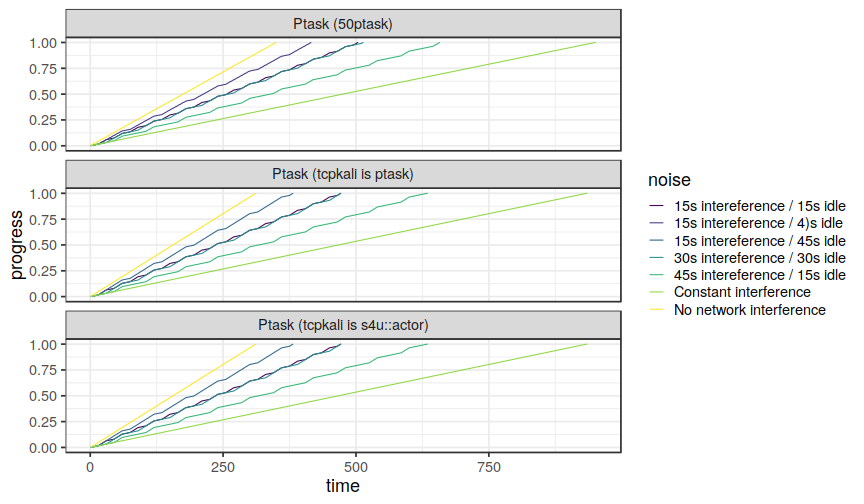

In [11]:
%%R -w 12 -h 7 --units in

library(tidyverse)
library(ggplot2)
library(viridis)

theme_set(theme_bw())

ilevels = c("No interference",
            "15s interference / 45s idle", 
            "15s interference / 15s idle",  
            "30s interference / 30s idle",
            "45s interference / 15s idle", 
            "Constant interference")

ptask_tcpkali_actor = read_csv("../experiments/simgrid/data/no_interference_tcpkali_actor.csv") %>% mutate(noise = "No network interference") %>%
    bind_rows(read_csv("../experiments/simgrid/data/15inter_0idle_tcpkali_actor.csv")  %>% mutate(noise = "Constant interference")) %>%
    bind_rows(read_csv("../experiments/simgrid/data/15inter_15idle_tcpkali_actor.csv") %>% mutate(noise = "15s intereference / 15s idle")) %>%
    bind_rows(read_csv("../experiments/simgrid/data/15inter_45idle_tcpkali_actor.csv") %>% mutate(noise = "15s intereference / 45s idle")) %>%
    bind_rows(read_csv("../experiments/simgrid/data/45inter_15idle_tcpkali_actor.csv") %>% mutate(noise = "45s intereference / 15s idle")) %>%
    bind_rows(read_csv("../experiments/simgrid/data/30inter_30idle_tcpkali_actor.csv") %>% mutate(noise = "30s intereference / 30s idle")) %>% 
    mutate(src = "Ptask (tcpkali is s4u::actor)")

ptask_tcpkali_ptask = read_csv("../experiments/simgrid/data/no_interference_tcpkali_ptask.csv") %>% mutate(noise = "No network interference") %>%
    bind_rows(read_csv("../experiments/simgrid/data/15inter_0idle_tcpkali_ptask.csv")  %>% mutate(noise = "Constant interference")) %>%
    bind_rows(read_csv("../experiments/simgrid/data/15inter_15idle_tcpkali_ptask.csv") %>% mutate(noise = "15s intereference / 15s idle")) %>%
    bind_rows(read_csv("../experiments/simgrid/data/15inter_45idle_tcpkali_ptask.csv") %>% mutate(noise = "15s intereference / 45s idle")) %>%
    bind_rows(read_csv("../experiments/simgrid/data/45inter_15idle_tcpkali_ptask.csv") %>% mutate(noise = "45s intereference / 15s idle")) %>%
    bind_rows(read_csv("../experiments/simgrid/data/30inter_30idle_tcpkali_ptask.csv") %>% mutate(noise = "30s intereference / 30s idle")) %>% 
    mutate(src = "Ptask (tcpkali is ptask)")

ptask_actor_sequence = read_csv("../experiments/simgrid/data/no_interference_tcpkali_actor_sequence.csv") %>% mutate(noise = "No network interference") %>%
    bind_rows(read_csv("../experiments/simgrid/data/15inter_0idle_actor_sequence.csv")  %>% mutate(noise = "Constant interference")) %>%
    bind_rows(read_csv("../experiments/simgrid/data/15inter_15idle_actor_sequence.csv") %>% mutate(noise = "15s intereference / 15s idle")) %>%
    bind_rows(read_csv("../experiments/simgrid/data/15inter_45idle_actor_sequence.csv") %>% mutate(noise = "15s intereference / 4)s idle")) %>%
    bind_rows(read_csv("../experiments/simgrid/data/45inter_15idle_actor_sequence.csv") %>% mutate(noise = "45s intereference / 15s idle")) %>%
    bind_rows(read_csv("../experiments/simgrid/data/30inter_30idle_actor_sequence.csv") %>% mutate(noise = "30s intereference / 30s idle")) %>% 
    mutate(src = "Ptask (50ptask)")

ptask = bind_rows(ptask_tcpkali_actor, ptask_tcpkali_ptask, ptask_actor_sequence) %>% mutate(kind = "Ptask") 

ptask %>%
    ggplot(aes(y = progress, x = time, colour = noise)) +
    geom_line() + facet_wrap(~src, ncol = 1) + scale_color_viridis_d(end = 1) + theme_bw(base_size = 18) + 
    ggsave("img/progress_simumlation.pdf")


In [15]:
%%R
# ptask = ptask_tcpkali_actor_seq 

ptask = read_csv("data/simulation_only_results.csv") %>% filter(pattern != "100inter_100idle") %>% 
    filter(source != "Ptask (50ptasks)") %>%
    mutate(pattern = str_replace(pattern, "15inter_0idle", "Constant interference")) %>%
    mutate(pattern = str_replace(pattern, "45inter_15idle", "45s interference / 15s idle")) %>%
    mutate(pattern = str_replace(pattern, "15inter_45idle", "15s interference / 45s idle")) %>%
    mutate(pattern = str_replace(pattern, "15inter_15idle", "15s interference / 15s idle")) %>%
    mutate(pattern = str_replace(pattern, "30inter_30idle", "30s interference / 30s idle")) %>% 
    mutate(kind = "Simulation") %>%
    rename("interference" = pattern, "runtime" = time)

ptask = ptask %>% 
    mutate(inc_percentage = 100 * ((runtime - 312 ) / 312))

write_csv(ptask, "data/simulation_aggregated.csv")

xtable(ptask, type = "latex", file = "ptask_inc_percentage.tex")


% latex table generated in R 3.5.2 by xtable 1.8-3 package
% Thu Jul 30 19:19:26 2020
\begin{table}[ht]
\centering
\begin{tabular}{rlrllr}
  \hline
 & source & runtime & interference & kind & inc\_percentage \\ 
  \hline
1 & Ptask (tcpkali is s4u::Actor) & 312.00 & No interference & Simulation & 0.00 \\ 
  2 & Ptask (tcpkali is s4u::Actor) & 472.00 & 15s interference / 15s idle & Simulation & 51.28 \\ 
  3 & Ptask (tcpkali is s4u::Actor) & 472.00 & 30s interference / 30s idle & Simulation & 51.28 \\ 
  4 & Ptask (tcpkali is s4u::Actor) & 635.00 & 45s interference / 15s idle & Simulation & 103.53 \\ 
  5 & Ptask (tcpkali is s4u::Actor) & 382.00 & 15s interference / 45s idle & Simulation & 22.44 \\ 
  6 & Ptask (tcpkali is s4u::Actor) & 935.00 & Constant interference & Simulation & 199.68 \\ 
  7 & Ptask (tcpkali is 4 ptask) & 312.00 & No interference & Simulation & 0.00 \\ 
  8 & Ptask (tcpkali is 4 ptask) & 472.00 & 15s interference / 15s idle & Simulation & 51.28 \\ 
  9 & Ptask (tcpk

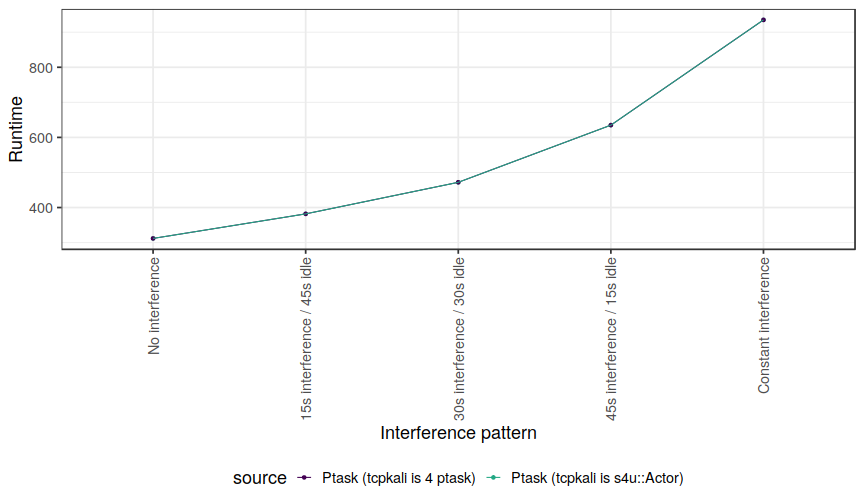

In [13]:
%%R -w 12 -h 7 --units in
library(xtable)

ptask %>% 
    ggplot(aes(y = runtime, x = factor(interference, levels = ilevels), color = source, group = source)) +
    geom_point() +
    geom_line() +
    scale_color_viridis_d(end = 0.6) + 
    theme_bw(base_size = 18) +
    ylab("Runtime") + 
    xlab("Interference pattern") + 
    theme(legend.position = "bottom") +
    theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=1))


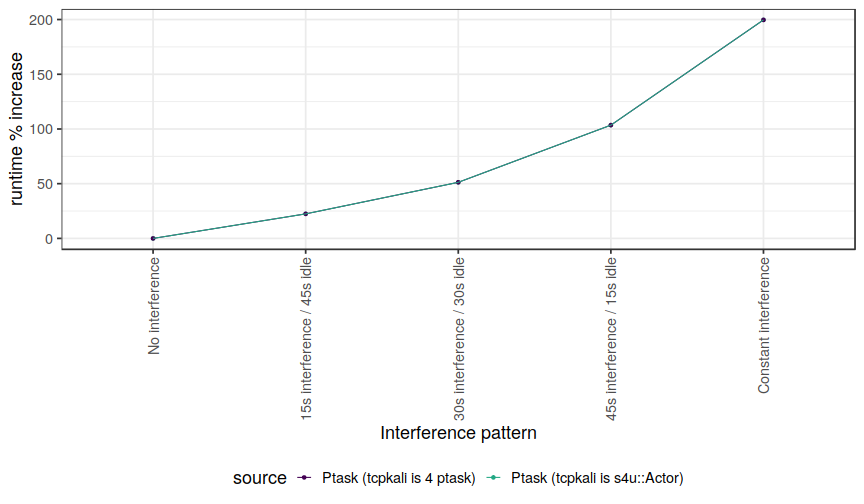

In [14]:
%%R -w 12 -h 7 --units in

ptask %>% 
    ggplot(aes(y = inc_percentage, x = factor(interference, levels = ilevels), color = source, group = source)) +
    geom_point() +
    geom_line() +
    scale_color_viridis_d(end = 0.6) + 
    theme_bw(base_size = 18) +
    ylab("runtime % increase") + 
    xlab("Interference pattern") + 
    theme(legend.position = "bottom") +
    theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=1))
